<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Idée-d'application" data-toc-modified-id="Idée-d'application-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Idée d'application</a></span></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#Vue-globale-du-dataset" data-toc-modified-id="Vue-globale-du-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Vue globale du dataset</a></span></li><li><span><a href="#Nettoyage-du-nom-du-produit" data-toc-modified-id="Nettoyage-du-nom-du-produit-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Nettoyage du nom du produit</a></span><ul class="toc-item"><li><span><a href="#Réduction-dimensionnelle-:-traitement-de-Product_name-et-Generic_name" data-toc-modified-id="Réduction-dimensionnelle-:-traitement-de-Product_name-et-Generic_name-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Réduction dimensionnelle : traitement de Product_name et Generic_name</a></span></li></ul></li><li><span><a href="#Sélection-des-variables-pertinentes-pour-notre-idée-d'application" data-toc-modified-id="Sélection-des-variables-pertinentes-pour-notre-idée-d'application-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sélection des variables pertinentes pour notre idée d'application</a></span><ul class="toc-item"><li><span><a href="#Sélection-des-variables-quantitatives" data-toc-modified-id="Sélection-des-variables-quantitatives-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Sélection des variables quantitatives</a></span><ul class="toc-item"><li><span><a href="#Comparaison-energy-kcal_100g-et-energy_100g" data-toc-modified-id="Comparaison-energy-kcal_100g-et-energy_100g-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Comparaison energy-kcal_100g et energy_100g</a></span></li></ul></li><li><span><a href="#Sélection-des-variables-qualitatives" data-toc-modified-id="Sélection-des-variables-qualitatives-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Sélection des variables qualitatives</a></span><ul class="toc-item"><li><span><a href="#Focus-sur-le-nutriscore_grade" data-toc-modified-id="Focus-sur-le-nutriscore_grade-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Focus sur le nutriscore_grade</a></span></li></ul></li><li><span><a href="#Sélection-définitive-des-variables-pertinentes-à-l'analyse" data-toc-modified-id="Sélection-définitive-des-variables-pertinentes-à-l'analyse-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Sélection définitive des variables pertinentes à l'analyse</a></span></li></ul></li><li><span><a href="#Traitement-des-valeurs-aberrantes--ou-atypiques" data-toc-modified-id="Traitement-des-valeurs-aberrantes--ou-atypiques-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Traitement des valeurs aberrantes  ou atypiques</a></span><ul class="toc-item"><li><span><a href="#Les-sommes-d'apports-nutritionnels-supérieures-à-100" data-toc-modified-id="Les-sommes-d'apports-nutritionnels-supérieures-à-100-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Les sommes d'apports nutritionnels supérieures à 100</a></span></li><li><span><a href="#Traitement-des-outliers" data-toc-modified-id="Traitement-des-outliers-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Traitement des outliers</a></span></li></ul></li></ul></li><li><span><a href="#Imputation-des-valeurs-manquantes" data-toc-modified-id="Imputation-des-valeurs-manquantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imputation des valeurs manquantes</a></span></li><li><span><a href="#Data-Master-pour-l'analyse" data-toc-modified-id="Data-Master-pour-l'analyse-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Master pour l'analyse</a></span></li></ul></div>

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import io
import requests
import seaborn as sns
%matplotlib inline
from functions import *
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
matplotlib.style.use('fivethirtyeight')

# Idée d'application

 _Prédire le Nutriscore à partir de certains apports nutritionnels d'un produit_

# Nettoyage des données

## Vue globale du dataset

In [2]:
link = "https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv"
s = requests.get(link).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\t', low_memory=False)
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638980 entries, 0 to 1638979
Columns: 184 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(60)
memory usage: 2.2+ GB


In [3]:
c.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.638980e+06,1.638980e+06,0.0,0.0,4.548460e+05,0.0,675319.000000,675319.000000,0.0,675319.000000,...,11584.000000,633781.000000,0.0,4.000000,0.0,41.000000,1713.000000,30.000000,47.000000,20.000000
mean,1.546560e+09,1.582482e+09,NaN,NaN,6.282311e+33,NaN,2.047869,0.020839,NaN,0.069348,...,624.307513,9.145901,NaN,34.175000,NaN,0.087998,0.068880,3.612333,0.364904,0.038885
std,4.857300e+07,2.781855e+07,NaN,NaN,4.236933e+36,NaN,2.921129,0.144658,NaN,0.301447,...,6156.069051,8.905409,NaN,15.620153,NaN,0.150672,1.826243,1.502140,2.330340,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,NaN,14.000000,NaN,0.000000,0.000000,0.400000,0.001350,0.004000
25%,1.516561e+09,1.572885e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,1.000000,NaN,26.000000,NaN,0.042000,0.000008,2.975000,0.008150,0.007000
50%,1.556789e+09,1.587635e+09,NaN,NaN,5.000000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,329.360000,10.000000,NaN,37.000000,NaN,0.069000,0.000023,4.000000,0.020000,0.008500
75%,1.587641e+09,1.602363e+09,NaN,NaN,1.130000e+02,NaN,3.000000,0.000000,NaN,0.000000,...,614.200000,16.000000,NaN,45.175000,NaN,0.089000,0.000096,4.000000,0.027800,0.011250
max,1.614217e+09,1.614217e+09,NaN,NaN,2.857484e+39,NaN,49.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,NaN,48.700000,NaN,1.000000,54.000000,7.300000,16.000000,0.572000


In [4]:
# Copie du dataframe dans df pour manipulation. On conserve donc c pour besoins futurs
df = c.copy()

In [5]:
# exploration rapide de df pour voir le taux de valeurs manquantes et les lignes dupliquées
fast_dataset_info(df)

Le jeu de données contient 1638980 lignes et 184 colonnes,  1 lignes dupliquées
Taux de valeurs manquantes :  
ingredients_that_may_be_from_palm_oil    1.0
cities                                   1.0
allergens_en                             1.0
no_nutriments                            1.0
water-hardness_100g                      1.0
                                        ... 
last_modified_t                          0.0
created_datetime                         0.0
created_t                                0.0
url                                      0.0
code                                     0.0
Length: 184, dtype: float64 valeurs vides


In [6]:
# Observation des types de valeurs à manipuler.
df.dtypes.value_counts()

float64    122
object      60
int64        2
dtype: int64

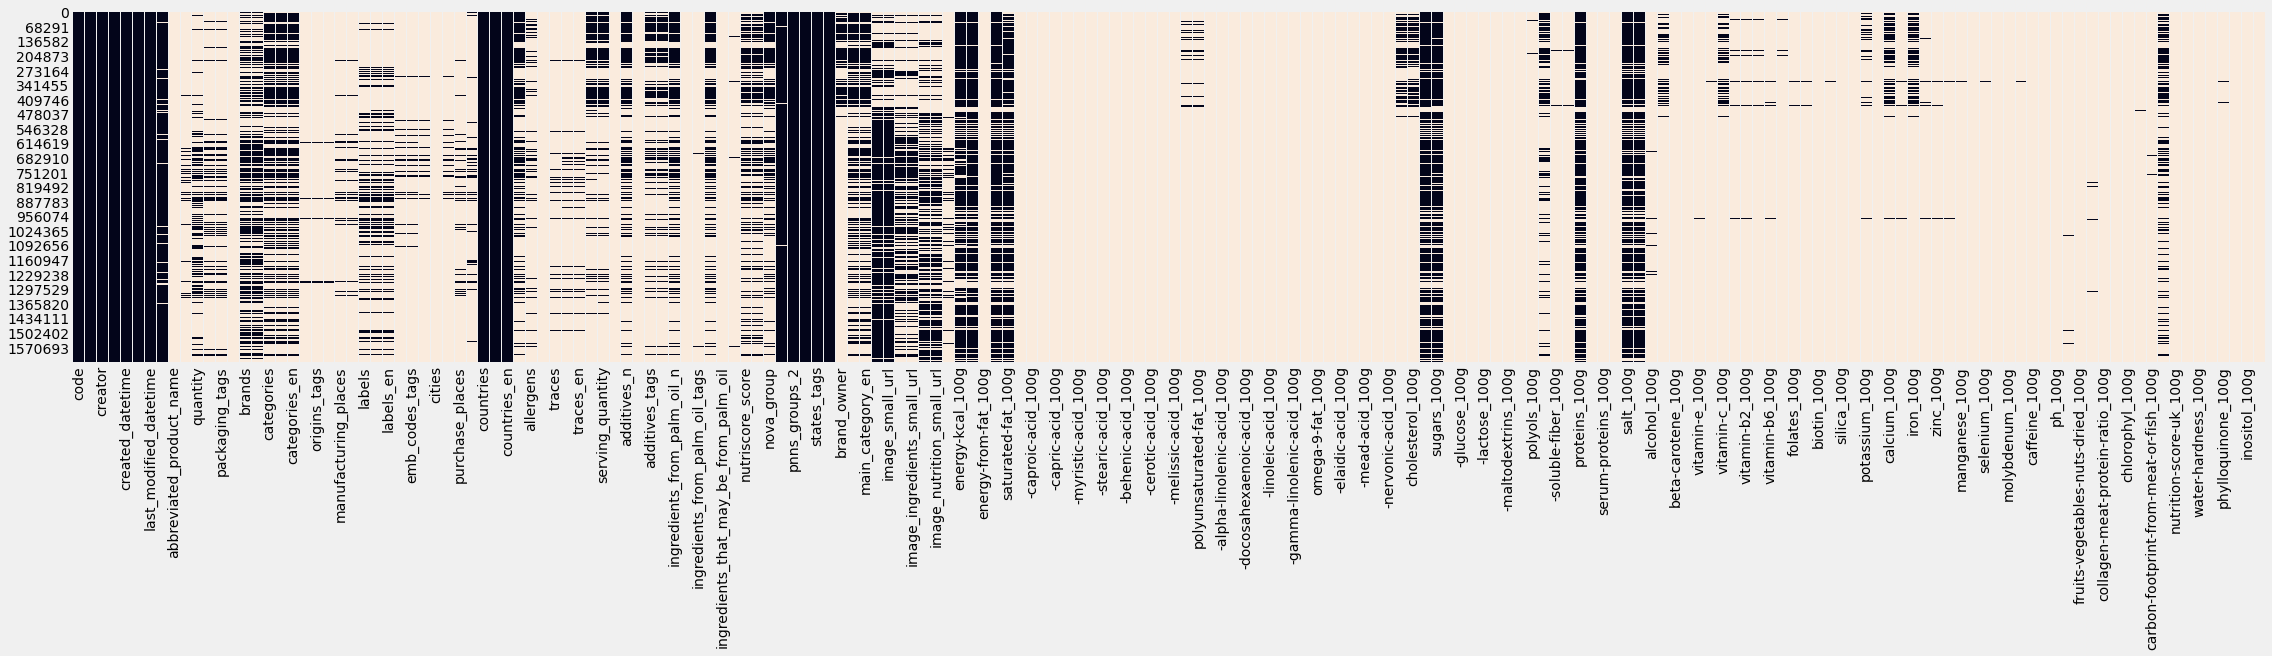

In [7]:
plt.figure(figsize=(35, 6))
sns.heatmap(df.isna(), cbar=False)

## Nettoyage du nom du produit

### Réduction dimensionnelle : traitement de Product_name et Generic_name

In [8]:
# Nous créons un DataFrame ne conservant que les entrées pour lesquelles nous n'avons pas le nom du produit
product_name_df = df[df.product_name.isna() == True]

In [9]:
# Dans un premier temps, nous allons supprimer de df les lignes pour lesquelles
# nous n'avons ni le nom du produit ni un generic_name disponible
df = df[(df.product_name.isna() == False) |
        ((df.product_name.isna() == True) & (df.generic_name.isna() == False))]

In [10]:
# Pour les lignes où product_name est NaN on remplace par generic_name
df = df.fillna(value={"product_name": "generic_name"})

In [11]:
df = df[df['code'].notna()]

In [12]:
df.drop_duplicates(subset ="code", 
                     keep = "first", inplace = True)

In [13]:
# Suppression des données dès qu'elles contiennent un ou plusieurs caractères chinois, coréens ou japonais
df = df[~df.product_name.str.contains("[\u4e00-\u9FFF]") &
        ~df.product_name.str.contains("[\uac00-\ud7a3]") &
        ~df.product_name.str.contains("[\u3040-\u30ff]")]

# Suppression des données dès qu'elles contiennent un ou plusieurs caractères cyrilliques
df = df[~df.product_name.str.contains('[\u0400-\u04FF]')]
# Suppression des données dès qu'elles contiennent un ou plusieurs caractères en hébreu
df = df[~df.product_name.str.contains('[\u0590-\u05FF]')]
# Suppression des données dès qu'elles contiennent un ou plusieurs caractères en arabe
df = df[~df.product_name.str.contains('[\u0600-\u06FF]')]
# Suppression des données dès qu'elles contiennent un ou plusieurs caractères en Thai
df = df[~df.product_name.str.contains('[\u0E00-\u0E7F]')]
# Suppression des données dès qu'elles contiennent un ou plusieurs caractères en alphabet grec
df = df[~df.product_name.str.contains('[\u0370-\u03FF]')]
# Suppression des données dès qu'elles contiennent certains caractères spéciaux d'autres langues
df = df[(~df.product_name.str.contains('[\u015B]')) &
        (~df.product_name.str.contains('[\u015E]')) &
        (~df.product_name.str.contains('[\u017E]')) &
        (~df.product_name.str.contains('[\u0160]')) &
        (~df.product_name.str.contains('[\u017D]')) &
        (~df.product_name.str.contains('[\u017C]')) &
        (~df.product_name.str.contains('[\u0161]')) &
        (~df.product_name.str.contains('[\u015A]')) &
        (~df.product_name.str.contains('[\u017B]'))]

In [14]:
dat = df

In [15]:
fast_dataset_info(dat)

Le jeu de données contient 1555341 lignes et 184 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
-elaidic-acid_100g     1.0
cities                 1.0
allergens_en           1.0
no_nutriments          1.0
water-hardness_100g    1.0
                      ... 
last_modified_t        0.0
created_datetime       0.0
created_t              0.0
url                    0.0
code                   0.0
Length: 184, dtype: float64 valeurs vides


## Sélection des variables pertinentes pour notre idée d'application

In [16]:
#(dat.isna().sum()/dat.shape[0]).sort_values(ascending=True)

In [17]:
# Les colonnes non remplies à 70% sont à supprimer, comportant malheureusement trop de valeurs manquantes pour faire
# l'objet de traitement
dat = dat[dat.columns[dat.isna().sum()/dat.shape[0] < 0.9]]
fast_dataset_info(dat)

Le jeu de données contient 1555341 lignes et 66 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
allergens           0.886439
stores              0.865329
vitamin-a_100g      0.863870
vitamin-c_100g      0.858996
packaging_tags      0.830953
                      ...   
last_modified_t     0.000000
created_datetime    0.000000
created_t           0.000000
url                 0.000000
code                0.000000
Length: 66, dtype: float64 valeurs vides


###  Sélection des variables quantitatives 

In [18]:
# Sélection des colonnes Float
text2_col = []
for col in dat.select_dtypes('float'):
    text2_col.append(col)
print(text2_col)

['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g']


In [19]:
# Selection manuelle des premières variables quantitatives qui semblent pertinantes pour l'analyse
text2_col1 = ['energy-kcal_100g', 'energy_100g', 'fat_100g',
              'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
              'salt_100g','fiber_100g'
              ]

#### Comparaison energy-kcal_100g et energy_100g

<ipython-input-20-d1b16d139098>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy['energy-kj_100g'] = 4.184*dat['energy-kcal_100g']


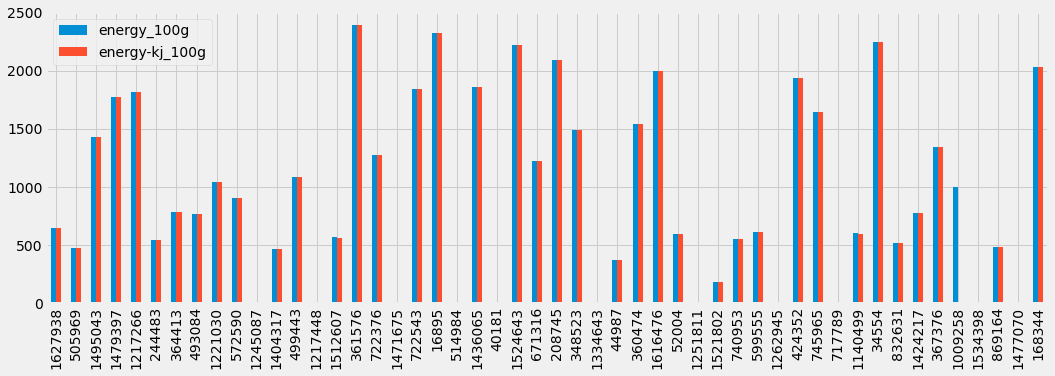

In [20]:
#Nous démontrons que df["energy_100g"] = 4.184*df['energy-kcal_100g']
# 1KCAL = 4.184 J
df_energy = dat[['energy-kcal_100g', 'energy_100g']]
df_energy['energy-kj_100g'] = 4.184*dat['energy-kcal_100g']
 
df_energy[['energy_100g', 'energy-kj_100g']
    ].sample(50).plot.bar(figsize=(16, 5))

In [21]:
float_col = ['energy-kcal_100g', 'fat_100g', 'carbohydrates_100g',
             'sugars_100g', 'proteins_100g', 'salt_100g','fiber_100g']

###  Sélection des variables qualitatives

In [22]:
text_col = []
for col in dat.select_dtypes('object'):
    text_col.append(col)
text_col

['code',
 'url',
 'creator',
 'created_datetime',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'labels',
 'labels_tags',
 'labels_en',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'serving_size',
 'additives_tags',
 'additives_en',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'brand_owner',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url']

#### Focus sur le nutriscore_grade

In [23]:
dat.nutriscore_grade.unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

In [24]:
#nutri_df = dataframe[df1["nutriscore_grade"].fillna(value = "N/A")]
nutri_df = pd.DataFrame(dat["nutriscore_grade"].fillna(value="N/A"),
                        columns=dat.columns, index=dat.index)

Text(0.5, 1, 'Part de chaque nutrigrade')

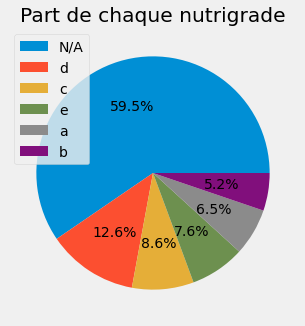

In [25]:
plt.figure(figsize=(5, 5))
plt.pie(nutri_df["nutriscore_grade"].value_counts(), autopct='%1.1f%%')
plt.legend(
    labels=nutri_df["nutriscore_grade"].value_counts().index, loc='upper left')
plt.title('Part de chaque nutrigrade', y=1)

In [26]:
object_col = ['code','nutriscore_grade']

### Sélection définitive des variables pertinentes à l'analyse 

In [27]:
relevant_col = float_col + object_col
print(relevant_col)

['energy-kcal_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'fiber_100g', 'code', 'nutriscore_grade']


In [28]:
df1 = df[relevant_col]

In [29]:
df1.rename(columns={'energy-kcal_100g': 'energy_kcal_100g'}, inplace=True)

/Users/macbookproal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
 #= ['energy_kcal_100g', 'fat_100g', 'carbohydrates_100g', 
                  #'sugars_100g', 'proteins_100g','salt_100g', 'fiber_100g']
relevant_float = []
for col in df1.select_dtypes('float'):
    relevant_float.append(col)
print(relevant_float)

['energy_kcal_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'fiber_100g']


In [31]:
fast_dataset_info(df1)

Le jeu de données contient 1555341 lignes et 9 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
fiber_100g            0.706695
nutriscore_grade      0.595452
energy_kcal_100g      0.206292
salt_100g             0.195187
sugars_100g           0.187417
carbohydrates_100g    0.176190
fat_100g              0.175882
proteins_100g         0.175183
code                  0.000000
dtype: float64 valeurs vides


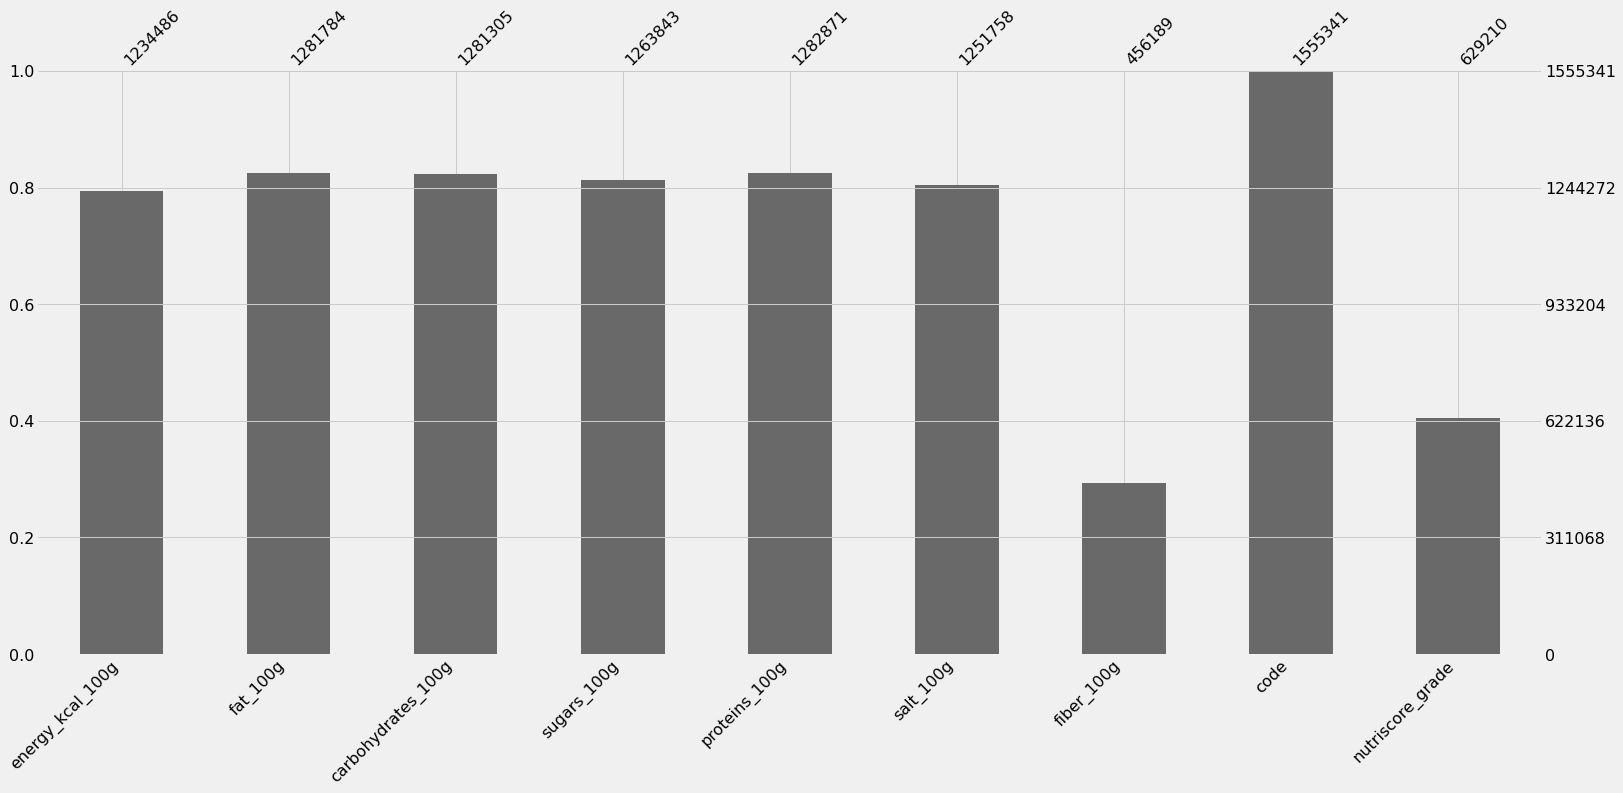

In [32]:
msno.bar(df1)

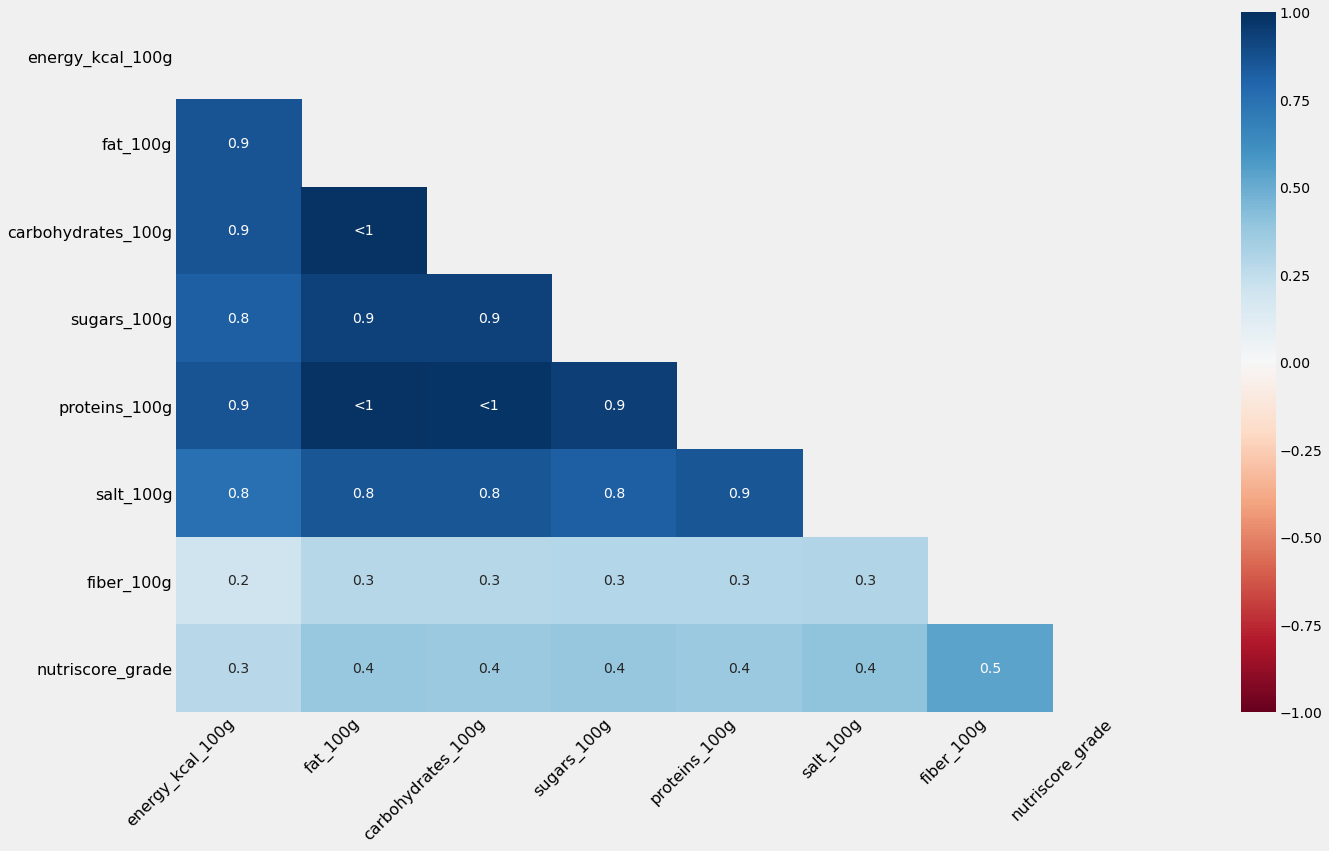

In [33]:
msno.heatmap(df1)

## Traitement des valeurs aberrantes  ou atypiques

### Les sommes d'apports nutritionnels supérieures à 100

In [34]:
Sum = df1[['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
            'salt_100g', 'fiber_100g']].sum(axis=1)

In [35]:
#Sum.plot.hist(bins=100, figsize=(10,4))
#plt.axvline(x=100, color='red')

In [36]:
df2=df1[Sum<=100]

In [37]:
fast_dataset_info(df2)

Le jeu de données contient 1240970 lignes et 9 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
fiber_100g            0.747701
nutriscore_grade      0.625926
energy_kcal_100g      0.248538
salt_100g             0.235891
sugars_100g           0.234279
carbohydrates_100g    0.220755
fat_100g              0.220129
proteins_100g         0.219167
code                  0.000000
dtype: float64 valeurs vides


### Traitement des outliers 

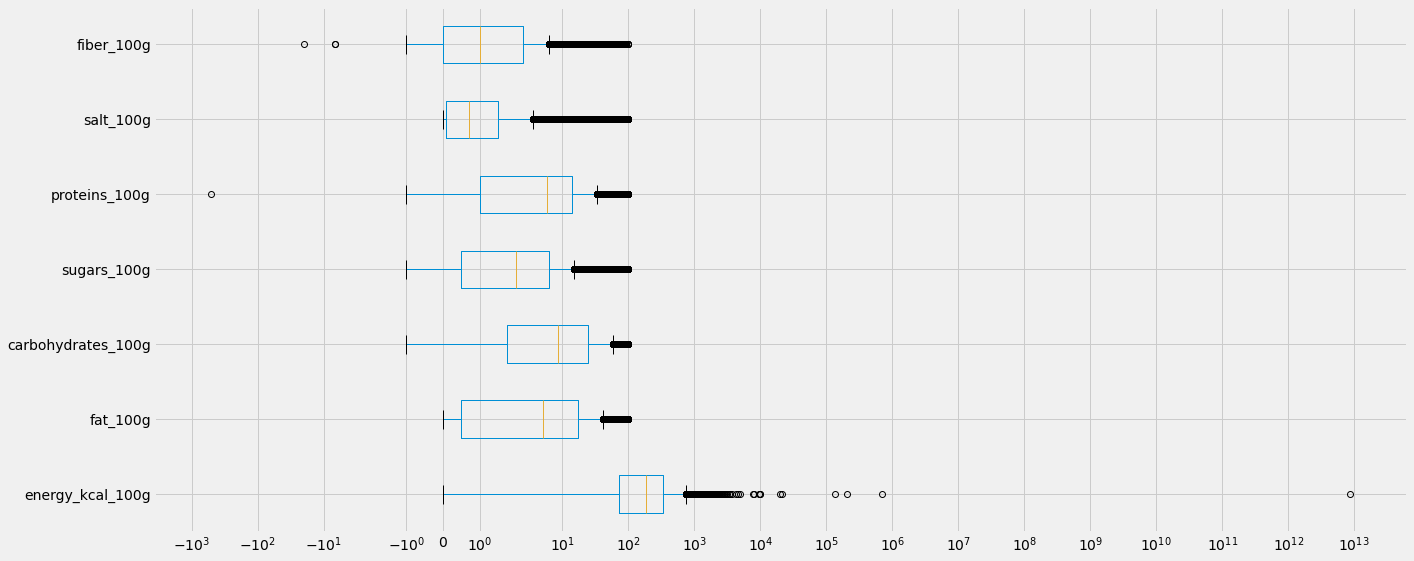

In [38]:
# Vérification des outliers
plt.figure(figsize=(20, 9))
ax = df2[relevant_float].boxplot(vert=False, figsize=(16, 7))
ax.set_xscale('symlog')

In [39]:
# Détection du pourcentage d'outliers par variable
for col in df2.select_dtypes('float'):
    q1, q3 = np.nanpercentile(df2[col], [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    low_bound = q3 - 1.5 * iqr
    conditions = ((df2[col] < low_bound) | (df2[col] > upper_bound))
    outliers = len(df2[conditions])/len(df2[df2[col].isnull() == False])
    outliers_conditions = conditions & (df2[col].isna() == False)
    df2[col] = np.where(outliers_conditions, df2[col].median(), df2[col])

    print("Il y a {}% de valeurs considérées comme outliers pour la colonne {} ".format(
        round(outliers*100, 2), col))

<ipython-input-39-64af3e4f9eb0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = np.where(outliers_conditions, df2[col].median(), df2[col])


Il y a 2.43% de valeurs considérées comme outliers pour la colonne energy_kcal_100g 
Il y a 5.78% de valeurs considérées comme outliers pour la colonne fat_100g 
Il y a 7.85% de valeurs considérées comme outliers pour la colonne carbohydrates_100g 
Il y a 9.41% de valeurs considérées comme outliers pour la colonne sugars_100g 
Il y a 1.71% de valeurs considérées comme outliers pour la colonne proteins_100g 
Il y a 6.12% de valeurs considérées comme outliers pour la colonne salt_100g 
Il y a 6.62% de valeurs considérées comme outliers pour la colonne fiber_100g 


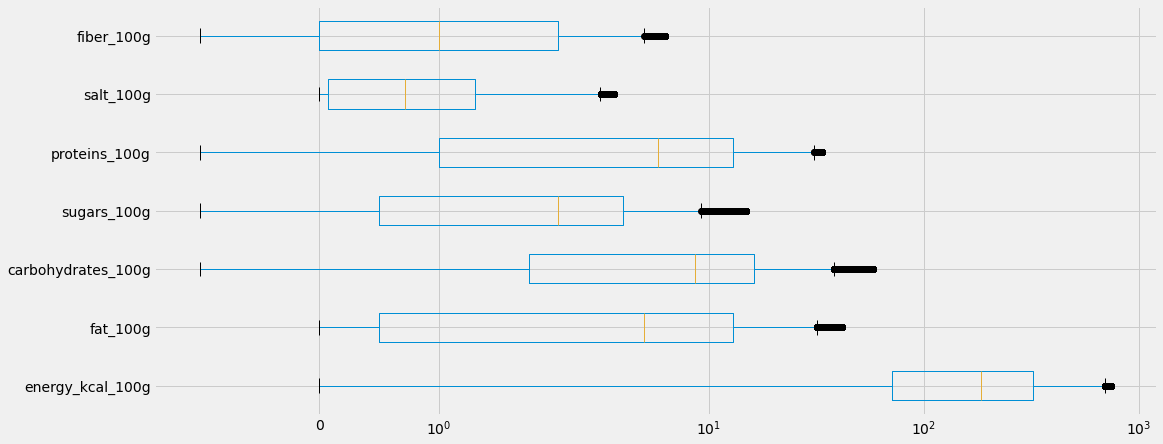

In [40]:
# Vérification de la situation des outliers après correction
#plt.rcParams['figure.figsize'] = (40, 20)
ax = df2[relevant_float].boxplot(vert=False, figsize=(16, 7))
ax.set_xscale('symlog')

In [41]:
fast_dataset_info(df2)

Le jeu de données contient 1240970 lignes et 9 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
fiber_100g            0.747701
nutriscore_grade      0.625926
energy_kcal_100g      0.248538
salt_100g             0.235891
sugars_100g           0.234279
carbohydrates_100g    0.220755
fat_100g              0.220129
proteins_100g         0.219167
code                  0.000000
dtype: float64 valeurs vides


# Imputation des valeurs manquantes

In [42]:
# Suppression de toutes les lignes où le Nutriscore_grade est manquant.
df3 = df2[~df2["nutriscore_grade"].isna()]
fast_dataset_info(df3)

Le jeu de données contient 464215 lignes et 9 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
fiber_100g            0.453979
energy_kcal_100g      0.076017
carbohydrates_100g    0.004015
sugars_100g           0.003490
proteins_100g         0.003466
fat_100g              0.003464
salt_100g             0.002607
nutriscore_grade      0.000000
code                  0.000000
dtype: float64 valeurs vides


In [43]:
df3.dtypes.value_counts()

float64    7
object     2
dtype: int64

In [44]:
# Supprimer la ligne si elle a plus de 3 valeurs numériques manquantes
df4 = df3.dropna(thresh=4)
fast_dataset_info(df4)

Le jeu de données contient 462645 lignes et 9 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
fiber_100g            0.452148
energy_kcal_100g      0.072937
carbohydrates_100g    0.000635
salt_100g             0.000149
sugars_100g           0.000110
proteins_100g         0.000084
fat_100g              0.000082
nutriscore_grade      0.000000
code                  0.000000
dtype: float64 valeurs vides


In [45]:
# Suppression des lignes dont certains nutriments ont une valeur supérieure à 100
#col_100g_lower = ["fiber_100g", "salt_100g", "proteins_100g", "sugars_100g",
 #                 "carbohydrates_100g", "fat_100g"]
#for col in col_100g_lower:
  #  df4[col] = df4[(df4[col] < 100)]
  #  df4[col]= df4[col].apply(pd.to_numeric)
#fast_dataset_info(df4)

In [46]:
df4

,energy_kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,fiber_100g,code,nutriscore_grade
3,NaN,8.2,29.0,2.0,5.1,0.715,0.0,0000000000100,d
14,32.0,0.3,5.3,3.9,0.9,0.420,NaN,0000000000949,b
23,381.0,22.0,27.3,2.0,4.6,0.100,4.4,0000000001281,d
33,157.0,0.0,36.0,2.0,0.6,0.000,3.6,0000000001885,a
37,143.0,12.7,3.9,1.0,1.9,0.270,NaN,0000000002257,b
...,...,...,...,...,...,...,...,...,...
1638963,346.0,27.0,19.0,2.0,6.0,0.190,NaN,9999991042742,d
1638965,351.0,0.5,8.6,0.0,7.0,0.000,NaN,9999991149090,b
1638969,333.0,20.2,30.9,10.4,7.4,1.100,NaN,9999999004360,d
1638971,NaN,7.6,35.0,2.0,2.6,0.280,NaN,9999999175305,d


In [47]:
#POINT d'ARRET

In [48]:
df5 = df4

In [49]:
###Standardiser les variables numériques
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df5[relevant_float])
data_scaled

array([[        nan, -0.06745739,  1.14735708, ..., -0.3958757 ,
        -0.14571745, -0.8721398 ],
       [-1.16307136, -0.84017672, -0.53030176, ..., -0.91217673,
        -0.51126212,         nan],
       [ 1.12991338,  1.28235612,  1.02701868, ..., -0.45734011,
        -0.90778515,  2.17009819],
       ...,
       [ 0.81454585,  1.10629348,  1.28185294, ..., -0.11313943,
         0.33134932,         nan],
       [        nan, -0.12614494,  1.57208084, ..., -0.70319774,
        -0.68474095,         nan],
       [-0.51262583, -0.38045763, -0.90547441, ...,  1.62015688,
        -0.80865439,         nan]])

In [50]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='median') 
dtrans = imputer.fit_transform(df5[relevant_float]) 
df6= pd.DataFrame(dtrans, columns = df5[relevant_float].columns,
                  index=df5[relevant_float].index)

In [51]:
df6

,energy_kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,fiber_100g
3,184.0,8.2,29.0,2.0,5.1,0.715,0.0
14,32.0,0.3,5.3,3.9,0.9,0.420,0.9
23,381.0,22.0,27.3,2.0,4.6,0.100,4.4
33,157.0,0.0,36.0,2.0,0.6,0.000,3.6
37,143.0,12.7,3.9,1.0,1.9,0.270,0.9
...,...,...,...,...,...,...,...
1638963,346.0,27.0,19.0,2.0,6.0,0.190,0.9
1638965,351.0,0.5,8.6,0.0,7.0,0.000,0.9
1638969,333.0,20.2,30.9,10.4,7.4,1.100,0.9
1638971,184.0,7.6,35.0,2.0,2.6,0.280,0.9


In [52]:
fast_dataset_info(df6)

Le jeu de données contient 462645 lignes et 7 colonnes,  133135 lignes dupliquées
Taux de valeurs manquantes :  
fiber_100g            0.0
salt_100g             0.0
proteins_100g         0.0
sugars_100g           0.0
carbohydrates_100g    0.0
fat_100g              0.0
energy_kcal_100g      0.0
dtype: float64 valeurs vides


In [53]:
df7= df6.drop_duplicates(keep = "first")

In [54]:
#from sklearn.impute import KNNImputer
#imputer1 = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#imputer1.fit(df4[relevant_float])
#Xtrans = imputer1.transform(df4[relevant_float])
#fast_dataset_info(xtrans)

# Data Master pour l'analyse

In [55]:
data = pd.merge(df7, df5["nutriscore_grade"], left_index=True, right_index=True)

In [56]:
fast_dataset_info(data)

Le jeu de données contient 329510 lignes et 8 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
nutriscore_grade      0.0
fiber_100g            0.0
salt_100g             0.0
proteins_100g         0.0
sugars_100g           0.0
carbohydrates_100g    0.0
fat_100g              0.0
energy_kcal_100g      0.0
dtype: float64 valeurs vides


In [57]:
data.to_csv('df_clean.csv')